In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("data/train_values.csv")

In [3]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [5]:
labels = pd.read_csv("data/train_labels.csv")

In [6]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
df = df.sort_values("building_id")
labels = labels.sort_values("building_id")

In [8]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
47748,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,0
212102,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,0
60133,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,0
34181,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,0
25045,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,0


In [9]:
labels.head()

,building_id,damage_grade
47748,4,2
212102,8,3
60133,12,3
34181,16,2
25045,17,2


In [10]:
df["damage_grade"] = labels["damage_grade"]

In [11]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
47748,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,2
212102,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,3
60133,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,3
34181,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,2
25045,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,2


In [12]:
df.to_csv("data/labeled_train.csv")

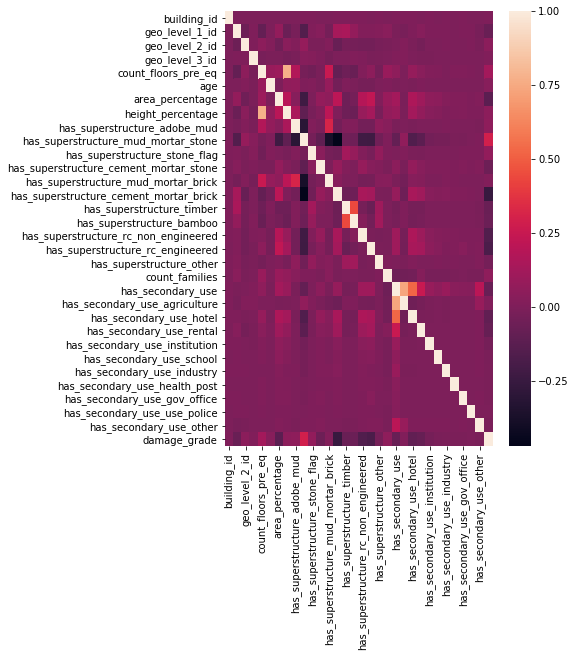

In [13]:
plt.rcParams["figure.figsize"] = (6,8)
sns.heatmap(df.corr())

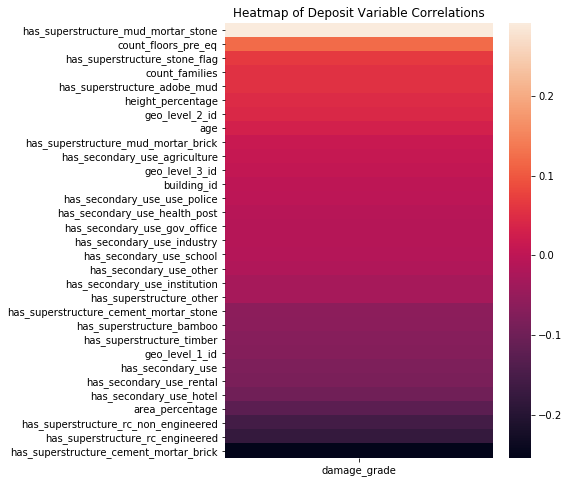

In [14]:
DEPOSIT_COLUMN = 'damage_grade'
correlation_matrix = df.corr()
def plot_deposit_correlations(data):
    '''
    Isolates the deposit columns of the correlation matrix and visualize it.
    '''
    deposit_correlation_column = pd.DataFrame(correlation_matrix[DEPOSIT_COLUMN].drop(DEPOSIT_COLUMN))
    deposit_correlation_column = deposit_correlation_column.sort_values(by=DEPOSIT_COLUMN, ascending=False)
    sns.heatmap(deposit_correlation_column)
    plt.title('Heatmap of Deposit Variable Correlations')
    
plot_deposit_correlations(df)


In [15]:
df = pd.read_csv("data/labeled_train.csv")

In [16]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,47748,4,30,266,1224,1,25,5,2,t,...,0,0,0,0,0,0,0,0,0,2
1,212102,8,17,409,12182,2,0,13,7,t,...,0,0,0,0,0,0,0,0,0,3
2,60133,12,17,716,7056,2,5,12,6,o,...,0,0,0,0,0,0,0,0,0,3
3,34181,16,4,651,105,2,80,5,4,n,...,0,0,0,0,0,0,0,0,0,2
4,25045,17,3,1387,3909,5,40,5,10,t,...,0,0,0,0,0,0,0,0,0,2


In [17]:
def fuck_naman(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    for letter in one_hot.columns:
        df[column_name + "_" + letter] = df[letter]
        df.drop(letter, axis=1, inplace=True)
    return df
        
    

In [18]:
df = fuck_naman(df, "foundation_type")

In [19]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w
0,47748,4,30,266,1224,1,25,5,2,t,...,0,0,0,0,2,0,0,1,0,0
1,212102,8,17,409,12182,2,0,13,7,t,...,0,0,0,0,3,0,0,1,0,0
2,60133,12,17,716,7056,2,5,12,6,o,...,0,0,0,0,3,0,0,1,0,0
3,34181,16,4,651,105,2,80,5,4,n,...,0,0,0,0,2,0,0,1,0,0
4,25045,17,3,1387,3909,5,40,5,10,t,...,0,0,0,0,2,0,0,1,0,0


In [20]:
categorical_vars = ["land_surface_condition", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
for var in categorical_vars:
    df = fuck_naman(df, var)

In [21]:
df.to_csv('data/labeled_train.csv')

In [22]:
df["damage_grade"].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

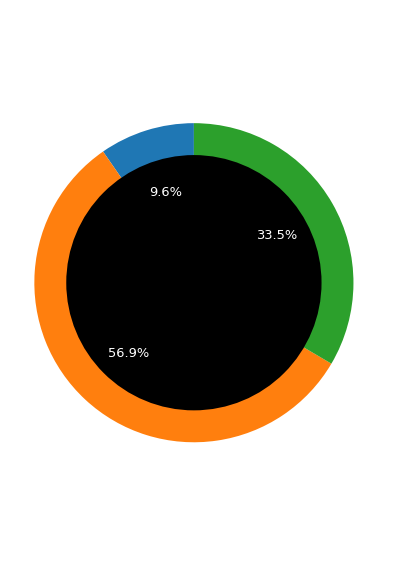

In [23]:

# Pie chart
labels = ['Damage 1', 'Damage 2', 'Damage 3']
sizes = [25124, 148259, 87218,]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0)  
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('white')
    text.set_size(13)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(13)
#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [24]:
normalized_df=(df-df.min())/(df.max()-df.min())
df = normalized_df

[0.5 1.  0. ]
(260601, 2)
   principal component 1  principal component 2
0               0.029283              -0.653984
1              -0.605595              -0.171097
2              -0.417904               1.041256
3              -0.719406              -0.306778
4              -0.102610              -0.187304


Text(0, 0.5, 'Second Principal Component')

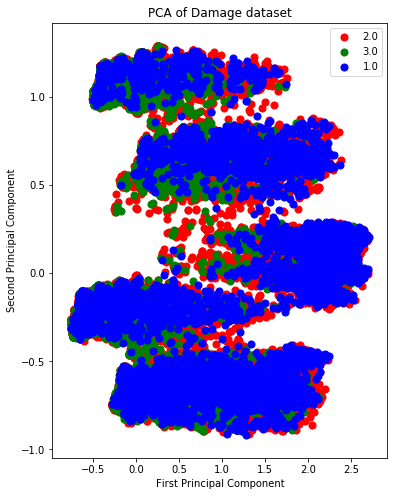

In [25]:
X = df.drop("damage_grade", axis=1)
y = df["damage_grade"]
targets = df["damage_grade"].unique()
print(targets)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print(X_r.shape)
PCA_Df = pd.DataFrame(data = X_r
             , columns = ['principal component 1', 'principal component 2'])
print(PCA_Df.head())
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['damage_grade'] == target
    plt.scatter(PCA_Df.loc[indicesToKeep, 'principal component 1']
               , PCA_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend((targets + .5) * 2)
plt.title('PCA of Damage dataset')
plt.xlabel("First Principal Component")
plt.ylabel('Second Principal Component')


[0.5 1.  0. ]
(260601, 3)


Text(0.5, 0, 'Second Principal Component')

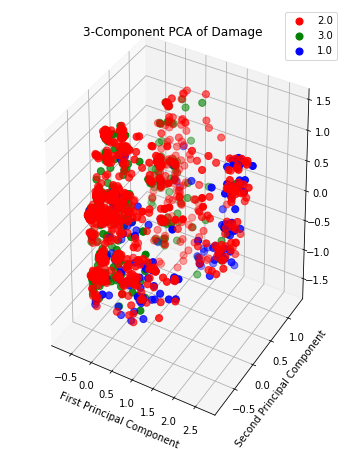

In [26]:
X = df.drop("damage_grade", axis=1)
y = df["damage_grade"]
targets = df["damage_grade"].unique()
print(targets)
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)
print(X_r.shape)
PCA_Df = pd.DataFrame(data = X_r[0:2000]
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
colors = ['r', 'g', 'b']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for target, color in zip(targets,colors):
    indicesToKeep = df['damage_grade'] == target
    ax.scatter(PCA_Df.loc[indicesToKeep, 'principal component 1']
               , PCA_Df.loc[indicesToKeep, 'principal component 2'], PCA_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
plt.legend((targets + .5) * 2)
plt.title('3-Component PCA of Damage ')
plt.xlabel("First Principal Component")
plt.ylabel('Second Principal Component')



/home/jordanrodrigues/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[-0.39785383 -1.70783617]
 [ 0.42992898 -0.02751219]
 [ 0.87874376  0.49585697]
 ...
 [ 0.61089644  0.2825365 ]
 [ 0.75307395  0.58296292]
 [ 1.70574956  7.67655413]]


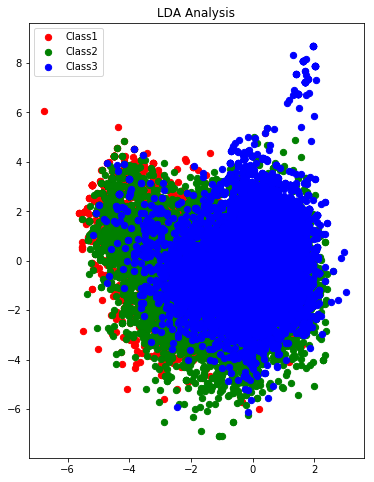

In [46]:
X = df.drop("damage_grade", axis=1).astype('int')
y = ((df["damage_grade"] + 0.5) * 2).astype('int')
lda = LDA(n_components=2)
dmg_lda = lda.fit_transform(X, y)
print(dmg_lda)
l_x = dmg_lda[:,0]
l_y = dmg_lda[:,1]
cdict={1:'red',2:'green',3:'blue'}
labl={1:'Class1',2:'Class2',3:'Class3'}
for l in np.unique(y):
    ix=np.where(y==l)
    ax = plt.scatter(l_x[ix],l_y[ix],c=cdict[l],s=40,
           label=labl[l])
plt.title("LDA Analysis")
plt.legend()

In [ ]:
df